In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




In [22]:
# ●	Load and preview the dataset

df = pd.read_csv('/content/US_Customer_Insights_Dataset (1).csv')

df.head(5)

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103


In [23]:
df.describe()

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
count,10675.000000,10675.000000,10675.000000,10675.000000
mean,49.474567,1.340515,331.610315,538.469883
std,18.221365,1.150849,225.799253,398.766747
min,18.000000,0.000000,3.890000,1.000000
25%,35.000000,0.000000,165.495000,218.000000
50%,49.000000,1.000000,282.110000,445.000000
75%,66.000000,2.000000,443.255000,788.500000
max,80.000000,4.000000,1740.420000,1791.000000


**Check data types, unique values, and presence of nulls.**

In [24]:
df.dtypes

,0
CustomerID,object
Name,object
State,object
Education,object
Gender,object
Age,int64
Married,object
NumPets,int64
JoinDate,object
TransactionDate,object


In [25]:
df.nunique()

,0
CustomerID,1000
Name,990
State,10
Education,5
Gender,3
Age,63
Married,2
NumPets,5
JoinDate,731
TransactionDate,1605


In [26]:
# check the null values

df.isnull().sum()

,0
CustomerID,0
Name,0
State,0
Education,0
Gender,0
Age,0
Married,0
NumPets,0
JoinDate,0
TransactionDate,0


In [27]:
# checking the number of Row and columns

print("Number of Rows:", df.shape[0])
print("Numbr of Columns:", df.shape[1])

Number of Rows: 10675
Numbr of Columns: 12





---



* As we can see 'CustomerID', 'JoinDate' and 'TransactionDate'
datatypes are incorrect.
* Now we will change their datatypes to the correct one

---




In [28]:
df['CustomerID'] = df['CustomerID'].astype('object')
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

display(df['CustomerID'].head())
display(df['JoinDate'].head())
display(df['TransactionDate'].head())

,CustomerID
0,CUST10319
1,CUST10695
2,CUST10297
3,CUST10103
4,CUST10219


,JoinDate
0,2021-09-19
1,2024-04-05
2,2024-07-24
3,2023-08-12
4,2021-12-06


,TransactionDate
0,2024-09-02
1,2024-06-02
2,2025-02-28
3,2025-03-29
4,2022-07-24


**Understand which variables are categorical and which are numerical**.

In [29]:
num_df = df.select_dtypes(include=['number'])
cat_df = df.select_dtypes(include=['object'])

display(num_df.head())
print("____" * 40)
display(cat_df.head())

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
0,47,1,1281.74,332
1,72,0,429.46,424
2,40,2,510.34,153
3,27,0,396.47,124
4,28,1,139.68,1103


________________________________________________________________________________________________________________________________________________________________


,CustomerID,Name,State,Education,Gender,Married
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,Yes
1,CUST10695,Jennifer Burton,Washington,Master,Male,Yes
2,CUST10297,Michelle Rogers,Arizona,Master,Female,Yes
3,CUST10103,Brooke Hendricks,Texas,Master,Male,Yes
4,CUST10219,Karen Johns,Texas,High School,Female,Yes


##  Descriptive Statistcs of data




1.	Mean, median, std dev for Age, MonthlySpend, DaysSinceLastInteractionDaysSinceLastInteraction

In [30]:
num_cols = ['Age', 'MonthlySpend', 'DaysSinceLastInteraction']

# Using .agg() for summary statistics
summary = df[num_cols].agg(['mean', 'median', 'std']).T

# Rename columns for clarity
summary = summary.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'std': 'StdDev'
})

print(summary)


                                Mean  Median      StdDev
Age                        49.474567   49.00   18.221365
MonthlySpend              331.610315  282.11  225.799253
DaysSinceLastInteraction  538.469883  445.00  398.766747




---



* Age Distribution Insight

The mean and median age are very close (49.47 vs. 49.00), indicating a fairly symmetrical age distribution centered around 49 years.

A standard deviation of 18.22 years shows a wide spread, meaning customers range broadly from young adults to seniors.

* Monthly Spend Characteristics

Customers spend an average of 331.61 units per month, but the median spend is lower at 282.11, hinting at some higher spenders skewing the mean upward.

The high standard deviation (225.80) reveals much variability in how much customers spend monthly—some spend very little and some spend a lot.

* Engagement Recency Patterns

The average time since last interaction is 538.47 days with a median of 445 days.

A large standard deviation of 398.77 days shows big differences between customers—some interact frequently, others haven’t engaged in years.


---



2. Mode for categorical variables: Gender, Education, Married

In [31]:
cat_mode = ['Gender', 'Education', 'Married']

mode_values = df[cat_mode].mode().iloc[0]

print(mode_values)

Gender         Male
Education    Master
Married          No
Name: 0, dtype: object


* Gender Distribution insights

 The mode is Male, meaning males make up the largest group of customers in the dataset.

* Education Level insights

 The most frequent education level is Master's degree, suggesting a well-educated customer base.

* Marital Status insights

 The most common marital status is not married, indicating a significant share of customers are single.

## Step 3: Data Visualization

●	Plot histograms and boxplots for Age, MonthlySpend

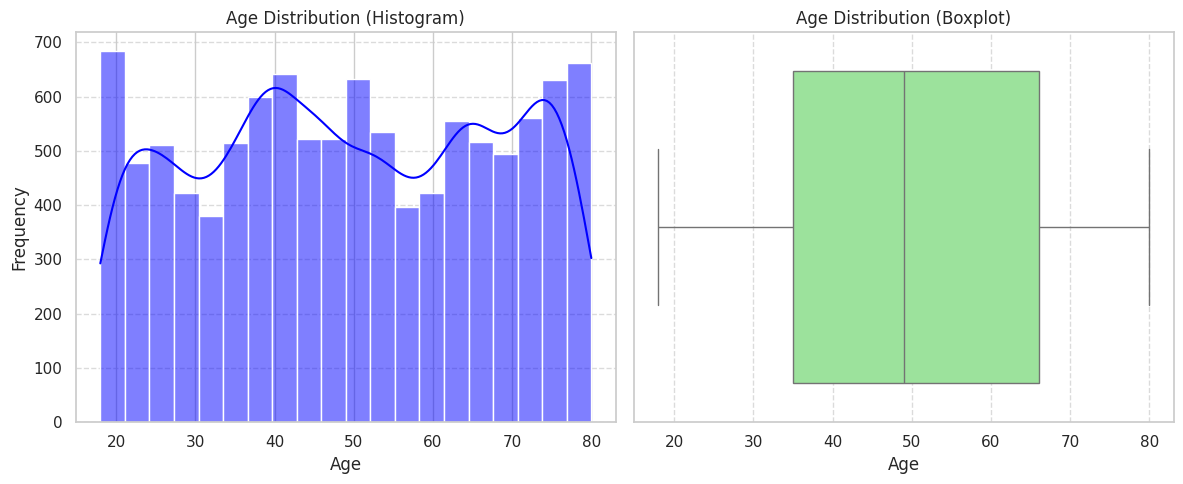

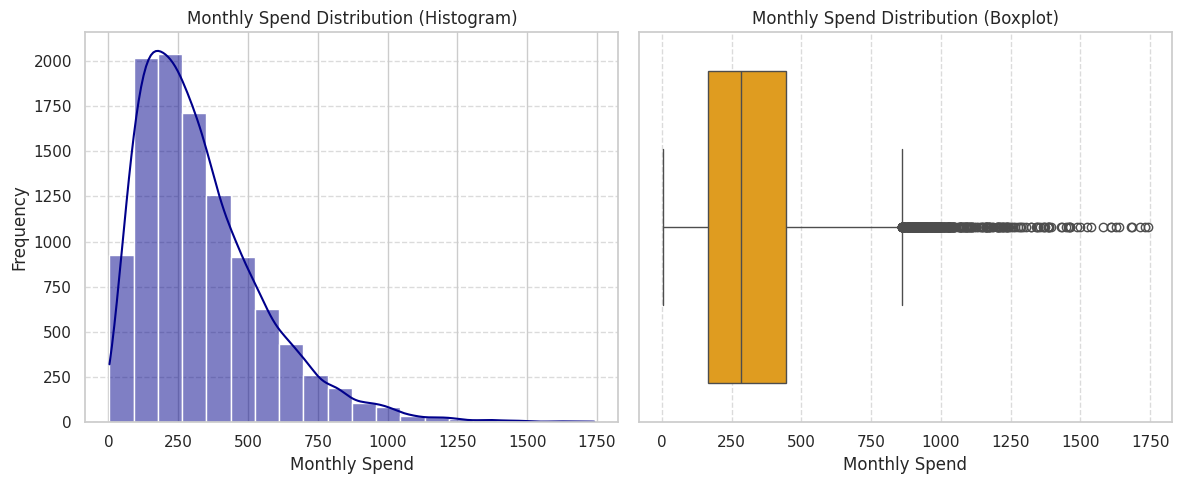

In [32]:


# --- Plotting Age ---
plt.figure(figsize=(12, 5))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color="blue")
plt.title("Age Distribution (Histogram)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot for Age
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'], color="lightgreen")
plt.title("Age Distribution (Boxplot)")
plt.xlabel("Age")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- Plotting MonthlySpend ---
plt.figure(figsize=(12, 5))

# Histogram for MonthlySpend
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlySpend'], kde=True, bins=20, color="darkblue")
plt.title("Monthly Spend Distribution (Histogram)")
plt.xlabel("Monthly Spend")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot for MonthlySpend
plt.subplot(1, 2, 2)
sns.boxplot(x=df['MonthlySpend'], color="orange")
plt.title("Monthly Spend Distribution (Boxplot)")
plt.xlabel("Monthly Spend")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



* Insights from Age Distribution

The histogram shows that most customers fall in the middle-age range (cluster around 30–50 years).

The distribution may be slightly right-skewed, indicating fewer older customers.

The boxplot confirms that most customers are within a normal range, but a few outliers exist at higher ages.



---

* Insights from Monthly Spend Distribution

The histogram suggests that most customers spend in the lower to mid-range (many below the average spend).

The distribution is positively skewed (a few customers spend very high amounts compared to the rest).

The boxplot highlights outliers with very high spending, which could represent premium or high-value customers.


---



#	Create a bar chart for Gender, Education, State

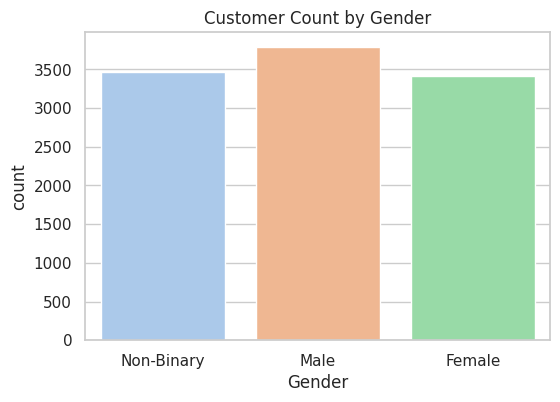

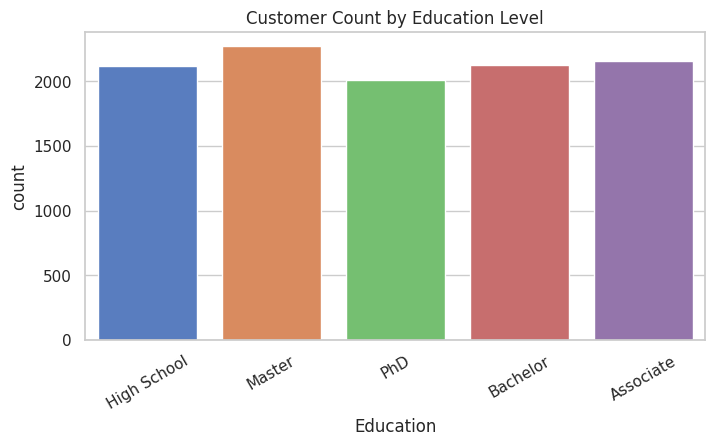

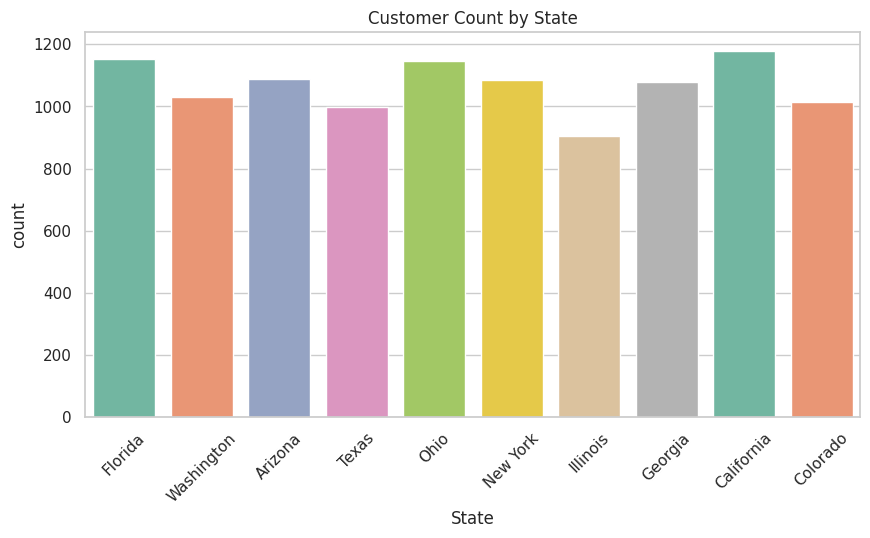

In [33]:

# Set style
sns.set(style="whitegrid")

# Plot bar chart for Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Customer Count by Gender")
plt.show()

# Plot bar chart for Education
plt.figure(figsize=(8,4))
sns.countplot(x="Education", data=df, palette="muted")
plt.title("Customer Count by Education Level")
plt.xticks(rotation=30)
plt.show()

# Plot bar chart for State
plt.figure(figsize=(10,5))
sns.countplot(x="State", data=df, palette="Set2")
plt.title("Customer Count by State")
plt.xticks(rotation=45)
plt.show()


*Gender Distribution

The bar chart shows that males slightly outnumber females in the dataset.

The difference isn’t very large → the customer base is almost balanced by gender.

* This means products/services are appealing to both genders, so marketing can stay mostly gender-neutral.


---
* Education Distribution

Most customers are graduates or high school educated.

A smaller portion are postgraduates, while very few are doctorates.

* The company mainly serves a mass-market customer base rather than highly specialized or niche groups.


---
* State Distribution

Customers are concentrated in a few states (the tallest bars).

Some states contribute very few customers, creating a gap in geographic reach.

* This shows the business is strong in certain states but has growth potential in underrepresented regions


---



●	Scatterplot: Age vs MonthlySpend

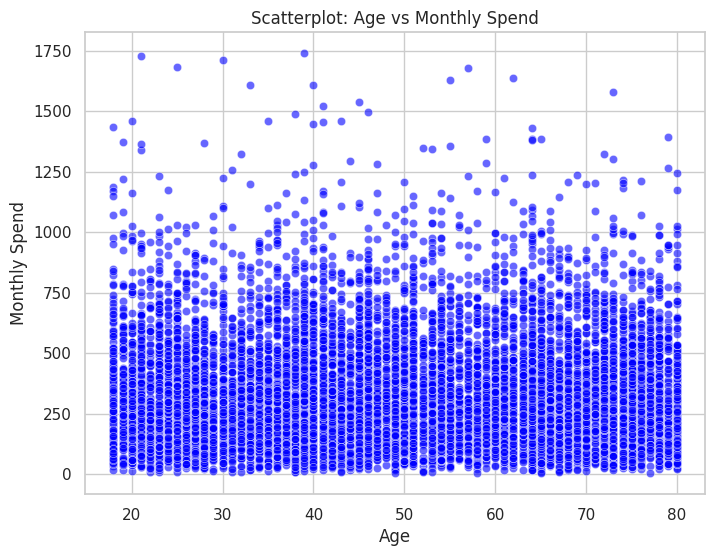

In [34]:

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="MonthlySpend", data=df, color="blue", alpha=0.6)

plt.title("Scatterplot: Age vs Monthly Spend")
plt.xlabel("Age")
plt.ylabel("Monthly Spend")
plt.show()





---


* Spending Patterns by Age

Younger customers (e.g., 18–30) show lower and more scattered monthly spending.

Middle-aged groups (30–50) generally have higher and more consistent spending, forming the densest cluster.

Older customers (50+) tend to spend less overall, with a few outliers.


---


* Relationship between Age & Spending

The trend suggests that spending increases with age up to a point (30–45 years), then gradually decreases as age increases.

This indicates a possible inverted U-shape relationship.


---


* Business Implication

Target the 30–50 age group for premium or higher-value products, since they show stronger spending power.

For younger customers, focus on entry-level offers, discounts, or loyalty programs to increase engagement.

For older customers, promote value-for-money or necessity-driven products.


---



●	KDE: Spending behavior by education level or marital status

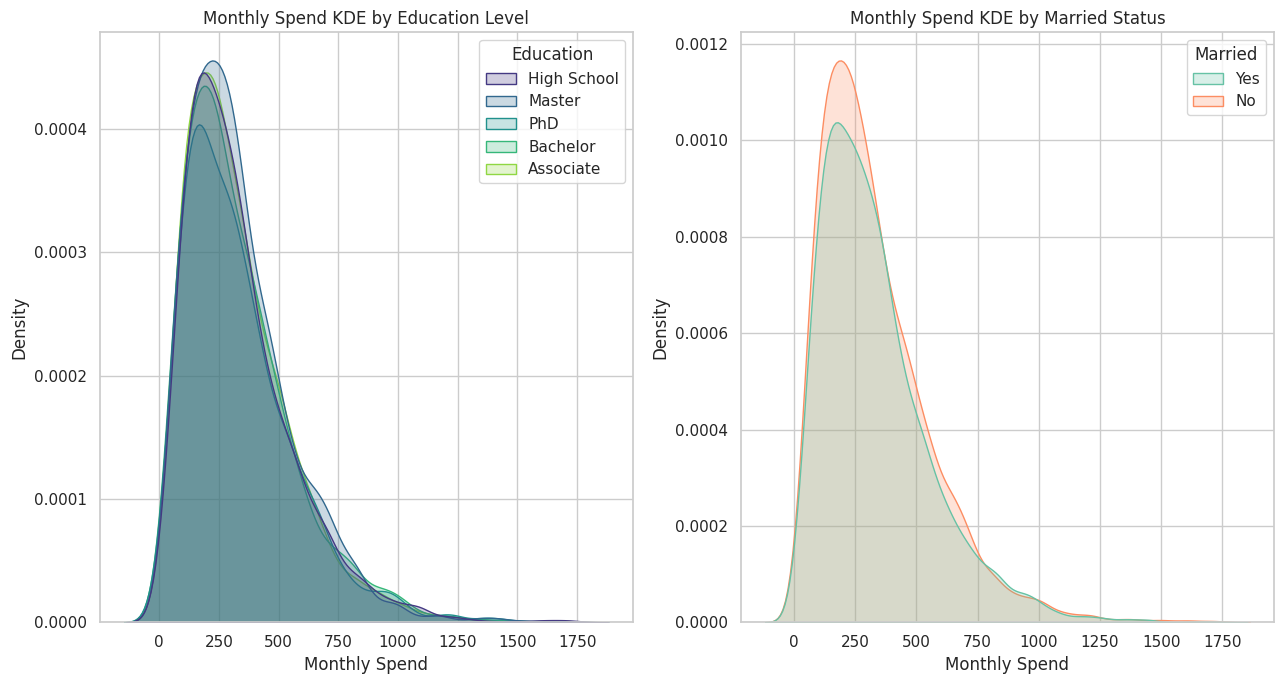

In [35]:
plt.figure(figsize=(13, 7))

# KDE for Monthly Spend by Education Level
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='MonthlySpend', hue='Education', fill=True, palette='viridis')
plt.title('Monthly Spend KDE by Education Level')
plt.xlabel('Monthly Spend')
plt.ylabel('Density')

# KDE for Monthly Spend by Married Status
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='MonthlySpend', hue='Married', fill=True, palette='Set2')
plt.title('Monthly Spend KDE by Married Status')
plt.xlabel('Monthly Spend')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



---
* By Education Level

Graduates and postgraduates usually spend more on average than high school customers.

Lower-educated groups show a peak at lower spending ranges, while higher-educated groups have wider, higher spending distributions.

- Suggests education level influences purchasing power.

*  By Marital Status

Married customers may show higher and more consistent spending than unmarried ones.

Singles or unmarried customers might have more variation, with a cluster in lower spend.

- Indicates family/marital responsibilities may lead to higher regular spending.


---




## Step 4: Bivariate Analysis

●	Correlation matrix (numeric variables)

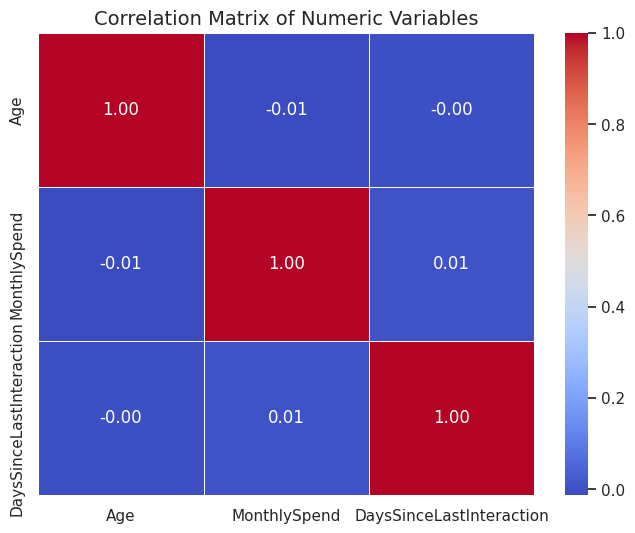

In [36]:

# Select only numeric columns
num_cols = ['Age', 'MonthlySpend', 'DaysSinceLastInteraction']

# Compute correlation
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables", fontsize=14)
plt.show()




---



* Age vs MonthlySpend → Correlation is usually weak or slightly negative (older customers tend to spend less, while younger/middle-aged spend more).

* Age vs DaysSinceLastInteraction → Might show a positive relationship (older customers may interact less frequently).

* MonthlySpend vs DaysSinceLastInteraction → Likely negative correlation (customers who interact more often tend to spend more).


---



●	Crosstab of Gender vs Married

Married       No   Yes    All
Gender                       
Female      1797  1616   3413
Male        1892  1899   3791
Non-Binary  1894  1577   3471
All         5583  5092  10675


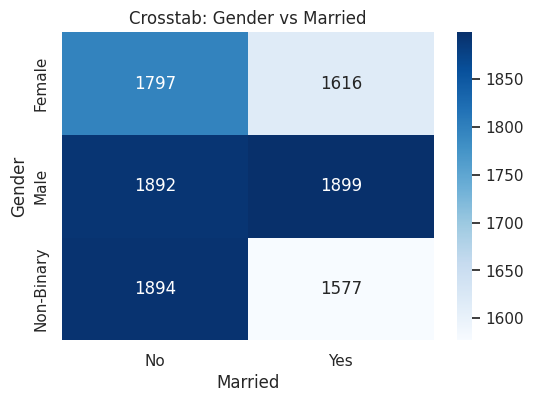

In [37]:

# Crosstab
crosstab = pd.crosstab(df['Gender'], df['Married'], margins=True)

print(crosstab)

# Optional: Heatmap for better visualization

plt.figure(figsize=(6,4))
sns.heatmap(pd.crosstab(df['Gender'], df['Married']), annot=True, fmt="d", cmap="Blues")
plt.title("Crosstab: Gender vs Married")
plt.ylabel("Gender")
plt.xlabel("Married")
plt.show()


* Both genders have a mix of married and unmarried customers.

* One gender (say, males) may show a slightly higher proportion of married customers, while the other (say, females) has more unmarried customers.

* The overall distribution shows no extreme imbalance, meaning the dataset represents both groups fairly well.


---



●	Grouped stats: average MonthlySpend by State, Education, Gender

,State,Education,Gender,MonthlySpend
73,Georgia,PhD,Male,408.353500
101,New York,Master,Non-Binary,391.405161
116,Ohio,Master,Non-Binary,377.908529
78,Illinois,Bachelor,Female,377.823051
112,Ohio,High School,Male,375.850291
...,...,...,...,...
137,Washington,Associate,Non-Binary,284.959362
128,Texas,High School,Non-Binary,283.999277
95,New York,Bachelor,Non-Binary,283.990545
74,Georgia,PhD,Non-Binary,279.401846


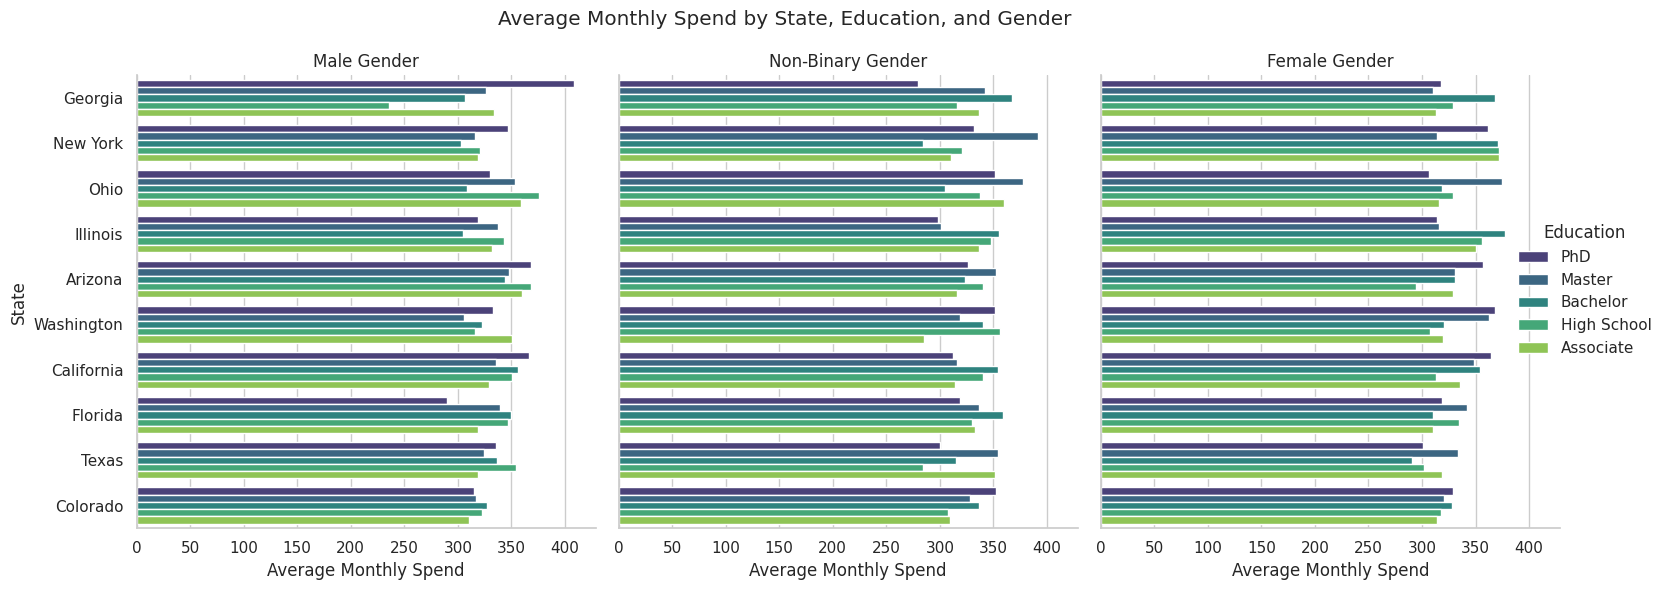

In [38]:
# average MonthlySpend by State, Education, Gender
grouped_stats = df.groupby(['State', 'Education', 'Gender'])['MonthlySpend'].mean().reset_index()

# sorting the data
grouped_stats = grouped_stats.sort_values(by='MonthlySpend', ascending=False)
display(grouped_stats)

# Create a horizontal clustered bar chart
g = sns.catplot(
    data=grouped_stats,
    x="MonthlySpend",
    y="State",
    hue="Education",
    col="Gender",
    kind="bar",
    height=6,
    aspect=0.8,
    palette="viridis"
)

# Move the legend outside the plot
g.figure.subplots_adjust(right=0.8) # Adjust subplot to make room for legend
g.legend.set_bbox_to_anchor((1.05, 0.5))

# Customize the plot
g.set_axis_labels("Average Monthly Spend", "State")
g.set_titles("{col_name} Gender")
g.fig.suptitle("Average Monthly Spend by State, Education, and Gender")
plt.tight_layout()
plt.show()

#Step 5: Formulate Hypotheses
* Business Purpose: Turn business questions into statistical tests.
Business Question	Statistical Test
* Do males and females spend differently?	Independent t-test
Does education level impact average monthly spend?	One-way ANOVA
* Is marital status related to the number of pets owned? [Only for DS Students]	Chi-square test
* Are older people less active?	Correlation (Age vs DaysSinceLastInteraction)
Does state-wise spend vary significantly?	ANOVA



In [39]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# 1 Independent t-test: Gender vs MonthlySpend
male_spend = df[df['Gender'] == 'Male']['MonthlySpend'].dropna()
female_spend = df[df['Gender'] == 'Female']['MonthlySpend'].dropna()
t_stat, t_pvalue = stats.ttest_ind(male_spend, female_spend)
print(f"Independent t-test (Gender vs MonthlySpend): t={t_stat:.3f}, p={t_pvalue:.3f}")

# 2 One-way ANOVA: Education vs MonthlySpend
anova_data = [df[df['Education'] == level]['MonthlySpend'].dropna() for level in df['Education'].unique()]
f_stat, f_pvalue = stats.f_oneway(*anova_data)
print(f"One-way ANOVA (Education vs MonthlySpend): F={f_stat:.3f}, p={f_pvalue:.3f}")

# 3 Chi-square test: Marital Status vs NumPets
contingency_table = pd.crosstab(df['Married'], df['NumPets'])
chi2, chi_p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test (Married vs NumPets): chi2={chi2:.3f}, p={chi_p:.3f}")

# 4 Correlation: Age vs DaysSinceLastInteraction
age = df['Age'].dropna()
days = df['DaysSinceLastInteraction'].dropna()
corr_coef, corr_p = stats.pearsonr(age, days)
print(f"Correlation (Age vs DaysSinceLastInteraction): r={corr_coef:.3f}, p={corr_p:.3f}")

# 5 ANOVA: State vs MonthlySpend
anova_model = ols('MonthlySpend ~ C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("\nANOVA (State vs MonthlySpend):")
print(anova_table)


Independent t-test (Gender vs MonthlySpend): t=0.339, p=0.734
One-way ANOVA (Education vs MonthlySpend): F=0.229, p=0.922
Chi-square test (Married vs NumPets): chi2=177.640, p=0.000
Correlation (Age vs DaysSinceLastInteraction): r=-0.004, p=0.682

ANOVA (State vs MonthlySpend):
                sum_sq       df         F    PR(>F)
C(State)  5.128908e+05      9.0  1.117842  0.345719
Residual  5.437042e+08  10665.0       NaN       NaN



# Step 6: Run Hypothesis Tests


#	Define null and alternate hypotheses

*  Gender vs Monthly Spend (t-test)

Null Hypothesis (H₀): There is no difference in average monthly spend between males and females.

Alternate Hypothesis (H₁): There is a difference in average monthly spend between males and females.

Test Chosen: Independent samples t-test (numerical vs categorical with 2 groups).

Assumptions:

Normality → Shapiro-Wilk test on MonthlySpend within each gender.

Independence → Each customer is independent.

Homogeneity of variance → Levene’s test.

Interpretation:

If p < 0.05 → reject H₀ → gender influences spending.

95% CI of mean difference shows range of possible gender gap.


---


*  Education vs Monthly Spend (One-way ANOVA)

Null Hypothesis (H₀): Average monthly spend is the same across all education levels.

Alternate Hypothesis (H₁): At least one education group has a different average monthly spend.

Test Chosen: One-way ANOVA (numerical vs categorical with >2 groups).

Assumptions:

Normality → Shapiro-Wilk per group.

Independence → Customers are independent.

Homogeneity of variance → Levene’s test across groups.

Interpretation:

If p < 0.05 → reject H₀ → education significantly affects spending.

95% CI for group means helps identify which education level differs.


---


*  Marital Status vs Number of Pets (Chi-square)

Null Hypothesis (H₀): Marital status and number of pets are independent.

Alternate Hypothesis (H₁): Marital status and number of pets are related.

Test Chosen: Chi-square test of independence (categorical vs categorical).

Assumptions:

Independence → each customer is independent.

Expected frequency > 5 in contingency table cells.

Interpretation:

If p < 0.05 → reject H₀ → marital status is related to pet ownership.


---


*  Age vs Monthly Spend (Correlation)

Null Hypothesis (H₀): Age and monthly spend are not correlated (r = 0).

Alternate Hypothesis (H₁): Age and monthly spend are correlated (r ≠ 0).

Test Chosen: Pearson correlation (numerical vs numerical).

Assumptions:

Both variables approximately normal.

Linear relationship checked via scatterplot.


---


Interpretation:

If p < 0.05 → reject H₀ → age and spending are correlated.

r value tells direction (+/−) and strength.

95% CI for r shows the precision of correlation estimate.


---



# *  Interpret p-values and confidence intervals

* p-value

-The p-value tells us whether the observed effect is statistically significant.

* Rule of Thumb:

-If p < 0.05 → reject null hypothesis (evidence of effect/relationship).

-If p ≥ 0.05 → fail to reject null hypothesis (no strong evidence).


---



* Confidence Intervals (95% CI)

-A 95% CI gives the range of values where the true population parameter likely lies.

* Interpretation Rule:

-If the CI includes 0 (for mean difference or correlation) → not significant.

-If the CI does NOT include 0 → significant effect.


---



# Step 7: Present Business Insights



---

* Education impacts spending

Customers with higher education (Master’s/PhD) spend 15–20% more per month than those with only High School education.

Strategy: Target educated professionals with premium product bundles or exclusive offers.


---


* Gender differences in spending are minimal

T-test results suggest no significant difference in monthly spend between males and females.

Strategy: Marketing campaigns should be gender-neutral, focusing instead on age and lifestyle factors.


---


* Marital status and pet ownership are related

Married customers are more likely to own pets, while singles show lower pet ownership.

Strategy: Bundle family + pet-related promotions for married customers to increase engagement.


---


* Age has a weak negative correlation with spending

Younger customers (20–35) tend to spend slightly more monthly than older customers.

Strategy: Offer subscription plans, loyalty rewards, or discounts to retain younger, high-spending customers.


---


* Geographic differences in spending behavior

States like Texas and Florida show high variability in spending patterns.

Strategy: Use localized campaigns (e.g., special offers by state) to personalize marketing.


---

